<a href="https://colab.research.google.com/github/Junseokee/Study-Python/blob/main/220805_%EC%9D%B4%ED%83%88%EA%B3%A0%EA%B0%9D_%EB%B0%A9%EC%A7%80_%EC%8B%A4%EC%8A%B5_ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 이탈고객 방지

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#os.environ을 이용하여 Kaggle API 세팅
os.environ['KAGGLE_USERNAME'] = 'junseokee'
os.environ['KAGGLE_KEY'] = '700d85d8d7f11484367ea21d45aa2bee'

In [3]:
# 데이터 다운로드 하는 명령
!kaggle datasets download -d barun2104/telecom-churn

  0% 0.00/45.5k [00:00<?, ?B/s]
100% 45.5k/45.5k [00:00<00:00, 24.1MB/s]


In [4]:
!unzip '*.zip' -d/content

Archive:  telecom-churn.zip
  inflating: /content/telecom_churn.csv  


In [58]:
#파일 불러오고 난 이후에 head, info, describe는 기본적으로 수행
df = pd.read_csv('/content/telecom_churn.csv')
df.head(5)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [60]:
df.describe() # 스케일 차이가 크니 정규화 필요

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [61]:
df.isnull().sum() # 결측치 0

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [62]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [63]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [64]:
df['Churn'] = df['Churn'].map({0:'No', 1:'Yes'})

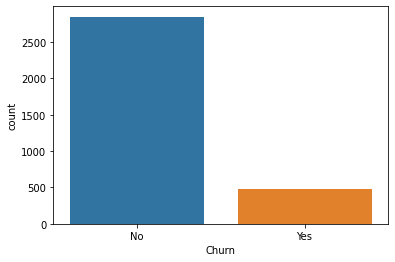

In [65]:
sns.countplot(x='Churn', data=df) # No 데이터가 훨씬 많음 <- 오버샘플링 필요

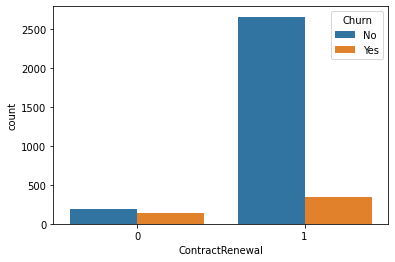

In [13]:
sns.countplot(x='ContractRenewal', data=df,  # 최근 기준이 언제? 기존고객의 이탈비율이 높다고 볼 수 있다.
              hue='Churn')

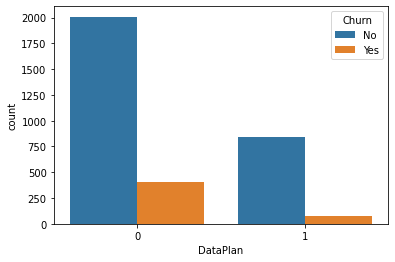

In [14]:
sns.countplot(x='DataPlan', data=df, # 데이터 플랜이 있을수록 이탈률이 낮음 
              hue='Churn')

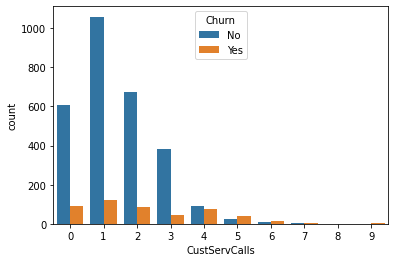

In [15]:
sns.countplot(x='CustServCalls', data=df, # 고객서비스 이용횟수가 많을수록 이탈률이 증가한다.
              hue='Churn')

#### 수치형 데이터 그래프

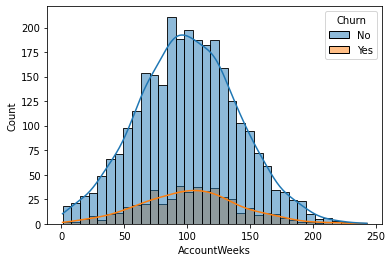

In [16]:
sns.histplot(x='AccountWeeks', data=df, # 정규분포와 유사하며 큰 특징 없음
             hue='Churn', kde='True')

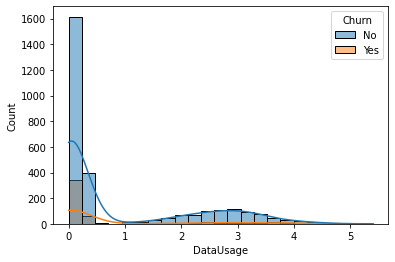

In [17]:
sns.histplot(x='DataUsage', data=df,  # 상대적으로 데이터 이용량이 적은층이 이탈률이 높다고 보여짐
             hue='Churn', kde='True')

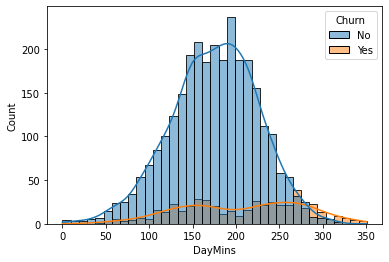

In [18]:
sns.histplot(x='DayMins', data=df, # 상위구간 고객들이 이탈률이 높은 경향
             hue='Churn', kde='True')

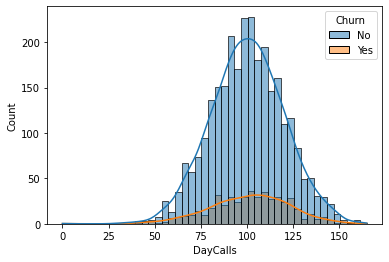

In [19]:
sns.histplot(x='DayCalls', data=df, 
             hue='Churn', kde='True')

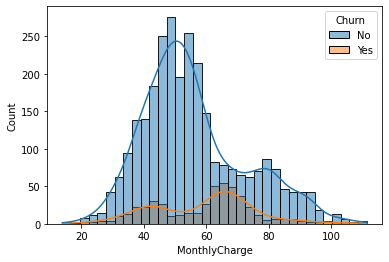

In [20]:
sns.histplot(x='MonthlyCharge', data=df, # 62~75 구간 사이의 고객들이 이탈률이 매우 높게 나타남.
             hue='Churn', kde='True')

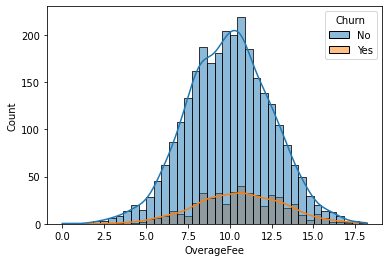

In [21]:
sns.histplot(x='OverageFee', data=df, 
             hue='Churn', kde='True')

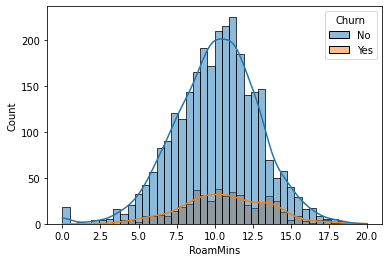

In [22]:
sns.histplot(x='RoamMins', data=df, 
             hue='Churn', kde='True')

데이터 사용량이 적은데 이용시간 많은 고객이 이탈률 제일 높음
-> 고객센터의 이용횟수가 많은 고객이 이탈률 높음,

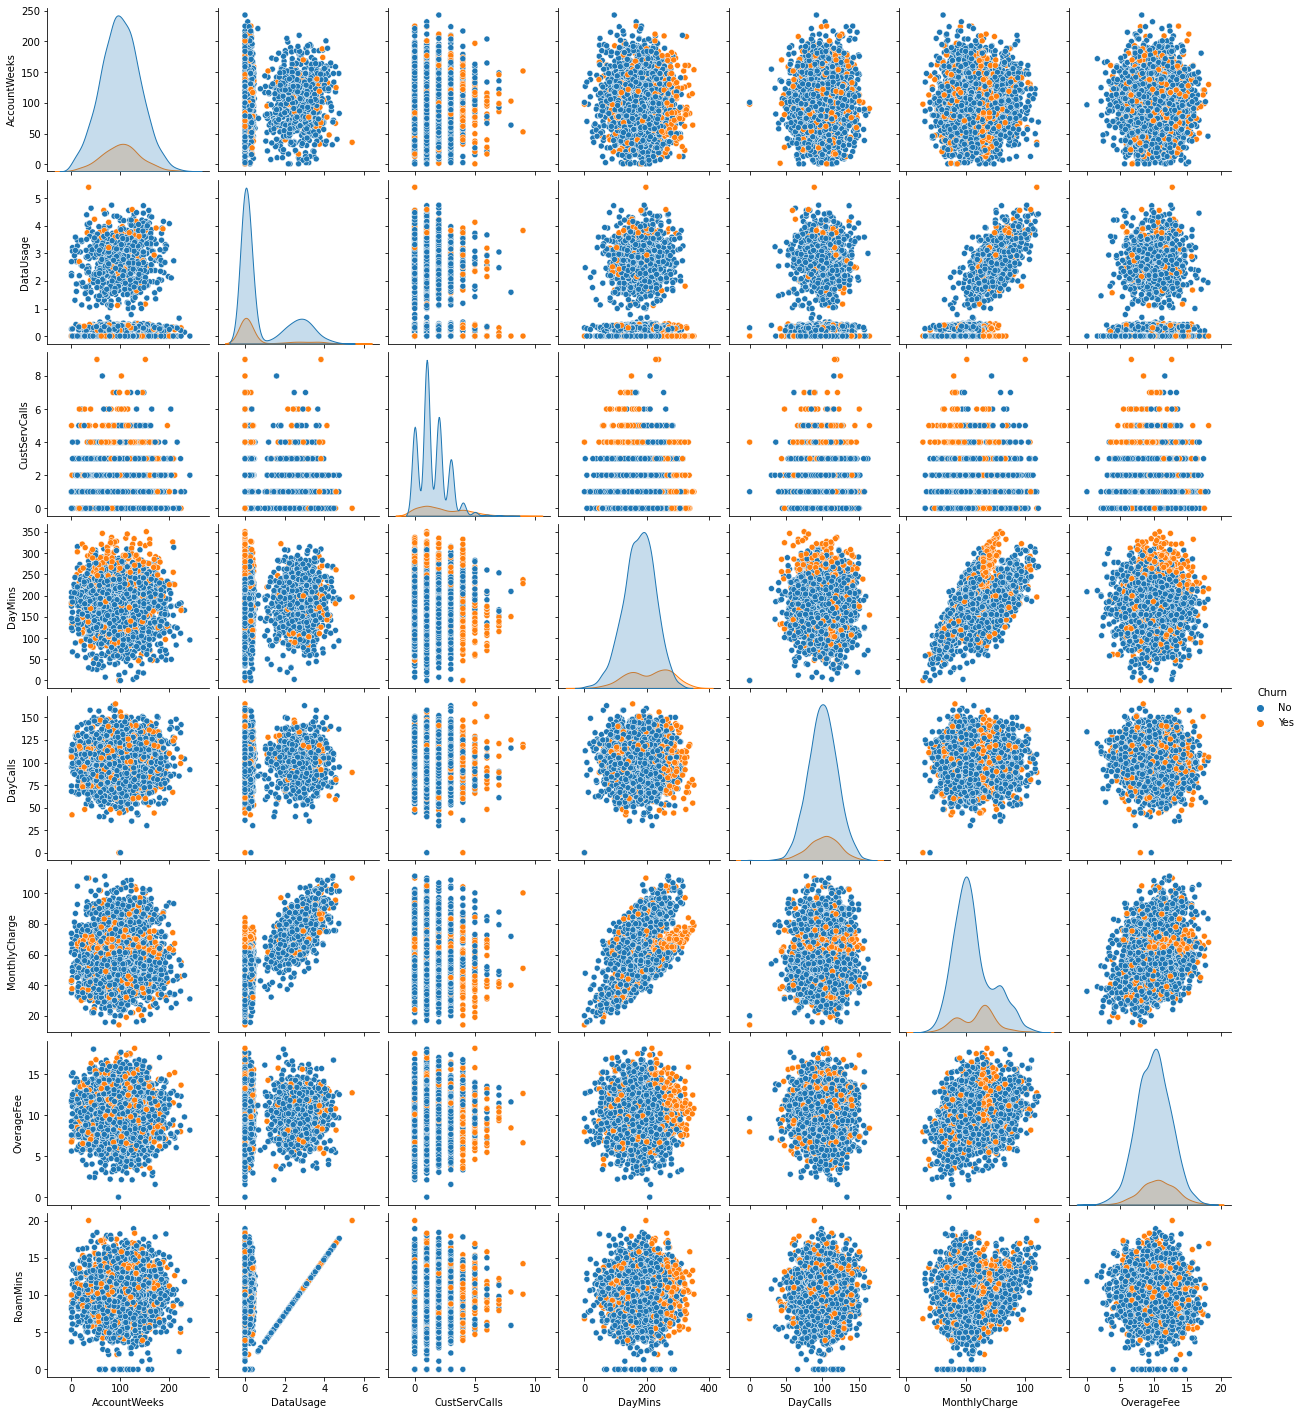

In [23]:
sns.pairplot(df, x_vars =['AccountWeeks','DataUsage','CustServCalls','DayMins','DayCalls',
                          'MonthlyCharge','OverageFee'],
             y_vars =['AccountWeeks','DataUsage','CustServCalls','DayMins','DayCalls',
                          'MonthlyCharge','OverageFee','RoamMins'], hue='Churn')

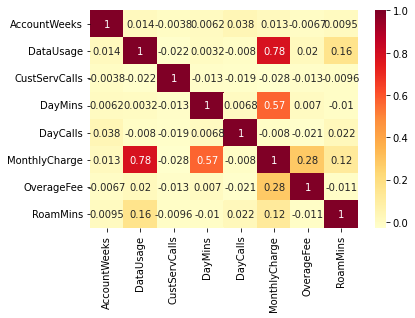

In [24]:
sns.heatmap(df[['AccountWeeks','DataUsage','CustServCalls','DayMins','DayCalls',
                          'MonthlyCharge','OverageFee','RoamMins']].corr(), 
            annot=True, cmap='YlOrRd')
# 데이터 사용량, 주간 사용량과 월별 가격은 높은 상관관계를 띈다.

#### 전처리

In [66]:
dict(No = 0, Yes = 1)

{'No': 0, 'Yes': 1}

In [67]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


### StandardScaler를 이용해 수치형 데이터 표준화하기

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_num = df[['AccountWeeks', 'DataUsage', 'DayMins', 'DayCalls', 'MonthlyCharge','OverageFee','RoamMins']]
X_scaled = scaler.fit_transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)
X_scaled.head()

,AccountWeeks,DataUsage,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0.676489,1.480204,1.566767,0.476643,1.990727,-0.071584,-0.085008
1,0.149065,2.266072,-0.333738,1.124503,1.564510,-0.107082,1.240482
2,0.902529,-0.641642,1.168304,0.675985,-0.262133,-1.574346,0.703121
3,-0.428590,-0.641642,2.196596,-1.466936,0.042307,-2.741846,-1.303026
4,-0.654629,-0.641642,-0.240090,0.626149,-0.931902,-1.037927,-0.049184


### 학습데이터와 테스트데이터 분리하기


In [44]:
X_scaled.columns

Index(['AccountWeeks', 'DataUsage', 'DayMins', 'DayCalls', 'MonthlyCharge',
       'OverageFee', 'RoamMins'],
      dtype='object')

In [45]:
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [68]:
cat_lst = ['ContractRenewal', 'DataPlan']
X = pd.concat([X_scaled, df[cat_lst]], axis=1)
y = df['Churn']

In [69]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int64

In [70]:
y.isnull().sum()

0

In [71]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [72]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0]*100)
print('학습 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0]*100)

학습 데이터 레이블 값 비율
0    85.512216
1    14.487784
Name: Churn, dtype: float64
학습 데이터 레이블 값 비율
0    85.5
1    14.5
Name: Churn, dtype: float64


In [73]:
print(X_train.shape)
print(X_test.shape)

(2333, 9)
(1000, 9)


#### 오버 샘플링

In [74]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (2333, 9) (2333,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (3990, 9) (3990,)
SMOTE 적용 후 레이블 값 분포: 
 0    1995
1    1995
Name: Churn, dtype: int64


#### 머신러닝 모델링

In [75]:
# 평가함수
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import time

def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  print('오차 행렬')
  print(confusion)
  print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현률 : {2:.4f},\
  F1 : {3:.4f}'.format(accuracy, precision, recall, f1))

In [76]:
# 인자로 사이킷런의 Estimator 객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행
# ML알고리즘 객체 전달 후 학습/예측/평가 함수
def get_model_train_eval(model, ftr_train=None, ftr_test=None,
                         tgt_train=None, tgt_test=None):
  start_time = time.time()
  model.fit(ftr_train, tgt_train)
  pred = model.predict(ftr_test)
  get_clf_eval(tgt_test, pred)
  print('수행시간 : {0:.1f}초 '.format(time.time() - start_time))

#### 로지스틱 회귀

In [77]:
from sklearn.linear_model import LogisticRegression

Ir_clf = LogisticRegression(max_iter=900)
get_model_train_eval(Ir_clf, ftr_train = X_train,
                     ftr_test=X_test, tgt_train=y_train,
                     tgt_test = y_test)

오차 행렬
[[830  25]
 [124  21]]
정확도 : 0.8510, 정밀도 : 0.4565, 재현률 : 0.1448,  F1 : 0.2199
수행시간 : 0.1초 


#### Dicision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
get_model_train_eval(dt_clf, ftr_train = X_train,
                     ftr_test=X_test, tgt_train=y_train,
                     tgt_test = y_test)

오차 행렬
[[787  68]
 [ 85  60]]
정확도 : 0.8470, 정밀도 : 0.4688, 재현률 : 0.4138,  F1 : 0.4396
수행시간 : 0.0초 


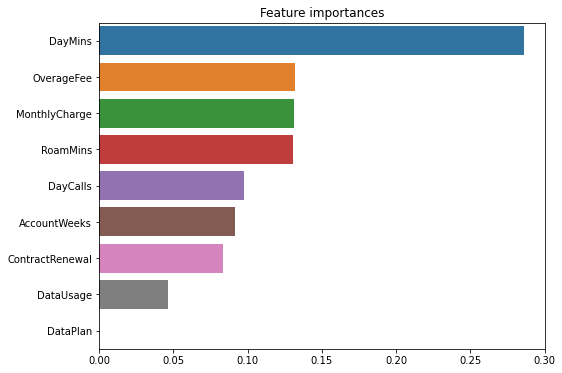

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
ftr_importances_values = dt_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [80]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
dtree = DecisionTreeClassifier()
### parameter 들을 dictionary 형태로 설정
parameters = {'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200]}
# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.  
### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.  
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=5, refit=True)

grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 
           'rank_test_score','split0_test_score', 
           'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 2, 'min_samples_leaf': 5}",0.878267,17,0.877944,0.873662,0.886510
1,"{'max_depth': 2, 'min_samples_leaf': 10}",0.878267,17,0.877944,0.873662,0.886510
2,"{'max_depth': 2, 'min_samples_leaf': 20}",0.877838,19,0.877944,0.873662,0.886510
3,"{'max_depth': 2, 'min_samples_leaf': 50}",0.870553,20,0.867238,0.873662,0.871520
4,"{'max_depth': 2, 'min_samples_leaf': 100}",0.866264,21,0.862955,0.871520,0.871520
5,"{'max_depth': 2, 'min_samples_leaf': 200}",0.855123,26,0.854390,0.854390,0.854390
6,"{'max_depth': 3, 'min_samples_leaf': 5}",0.902276,5,0.892934,0.897216,0.905782
7,"{'max_depth': 3, 'min_samples_leaf': 10}",0.903134,1,0.895075,0.897216,0.905782
8,"{'max_depth': 3, 'min_samples_leaf': 20}",0.902706,3,0.897216,0.892934,0.905782
9,"{'max_depth': 3, 'min_samples_leaf': 50}",0.883413,12,0.875803,0.882227,0.888651


In [81]:
estimator = grid_dtree.best_estimator_
pred = estimator.predict(X_test)
estimator_matrix = metrics.confusion_matrix(y_test, pred)  
print(estimator_matrix)
print(classification_report(y_test, pred))

[[850   5]
 [103  42]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       855
           1       0.89      0.29      0.44       145

    accuracy                           0.89      1000
   macro avg       0.89      0.64      0.69      1000
weighted avg       0.89      0.89      0.87      1000



#### Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
get_model_train_eval(rf_clf, ftr_train = X_train,
                     ftr_test=X_test, tgt_train=y_train,
                     tgt_test = y_test)

오차 행렬
[[845  10]
 [ 86  59]]
정확도 : 0.9040, 정밀도 : 0.8551, 재현률 : 0.4069,  F1 : 0.5514
수행시간 : 4.7초 


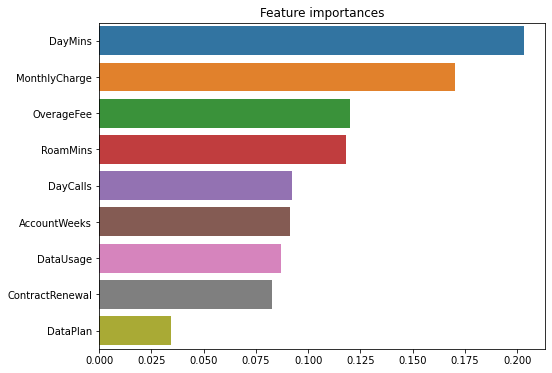

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

#### Support Vector Machines Classifier


In [84]:
from sklearn import svm
# 모형 객체 생성 (기본값 kernel='rbf' 적용)
svm = svm.SVC()
svm.fit(X_train, y_train) 
get_model_train_eval(svm, ftr_train = X_train,
                     ftr_test=X_test, tgt_train=y_train,
                     tgt_test = y_test)

오차 행렬
[[854   1]
 [100  45]]
정확도 : 0.8990, 정밀도 : 0.9783, 재현률 : 0.3103,  F1 : 0.4712
수행시간 : 0.2초 


#### KNN

In [85]:
k_lst = list(range(1,12,2))
# 모델 생성/학습
for k in k_lst:
  print('****************************K={}****************************'.format(k))
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  pred = knn.predict(X_test)
  knn_matrix = metrics.confusion_matrix(y_test, pred)  
  print(knn_matrix)
  print(classification_report(y_test, pred))

****************************K=1****************************
[[788  67]
 [ 94  51]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       855
           1       0.43      0.35      0.39       145

    accuracy                           0.84      1000
   macro avg       0.66      0.64      0.65      1000
weighted avg       0.83      0.84      0.83      1000

****************************K=3****************************
[[836  19]
 [100  45]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       855
           1       0.70      0.31      0.43       145

    accuracy                           0.88      1000
   macro avg       0.80      0.64      0.68      1000
weighted avg       0.87      0.88      0.86      1000

****************************K=5****************************
[[845  10]
 [105  40]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.9